# Style や付属情報

### sns.set( )
- *context　(引数)*
    - **この plot がどういう状況で使用されるかを引数に指定する**
        - notebook　:　default
            - paper, poster, talk
        
    
- style　(引数)
    - **表全体の　style　を変更することができる**
        - 
    
    
    
- palette引数

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [7]:
df = pd.read_csv('../pandas/dataset/tmdb_5000_movies.csv')

## sns.set(context=)

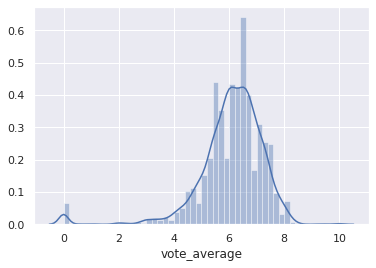

In [8]:
# contexte: 'paper', 'notebook', 'talk', 'poster'
sns.set(context='notebook')
sns.distplot(df['vote_average'])

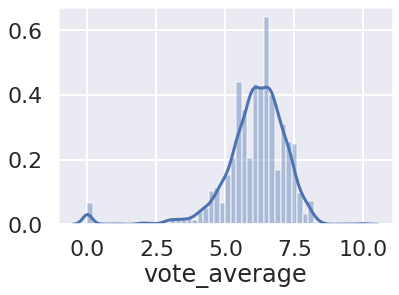

In [9]:
# poster
sns.set(context='poster')
sns.distplot(df['vote_average'])

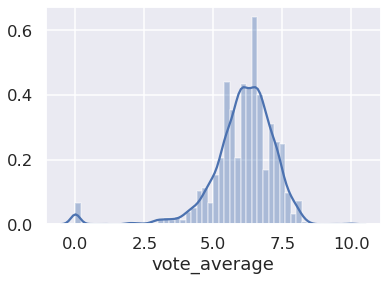

In [10]:
# talk
sns.set(context='talk')
sns.distplot(df['vote_average'])

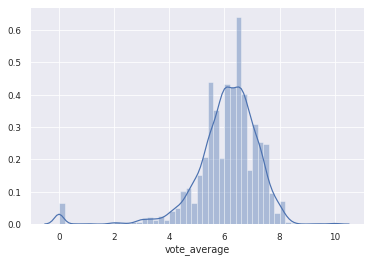

In [11]:
# paper
sns.set(context='paper')
sns.distplot(df['vote_average'])

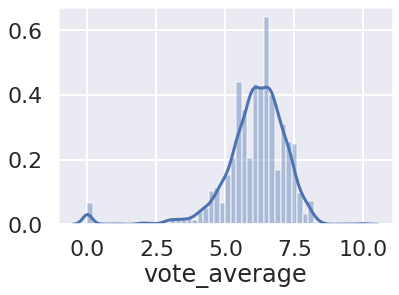

In [12]:
# sns.set_context() でも同じ事ができる
sns.set_context('poster')
sns.distplot(df['vote_average'])

## sns.set(context=) for文で回してみる

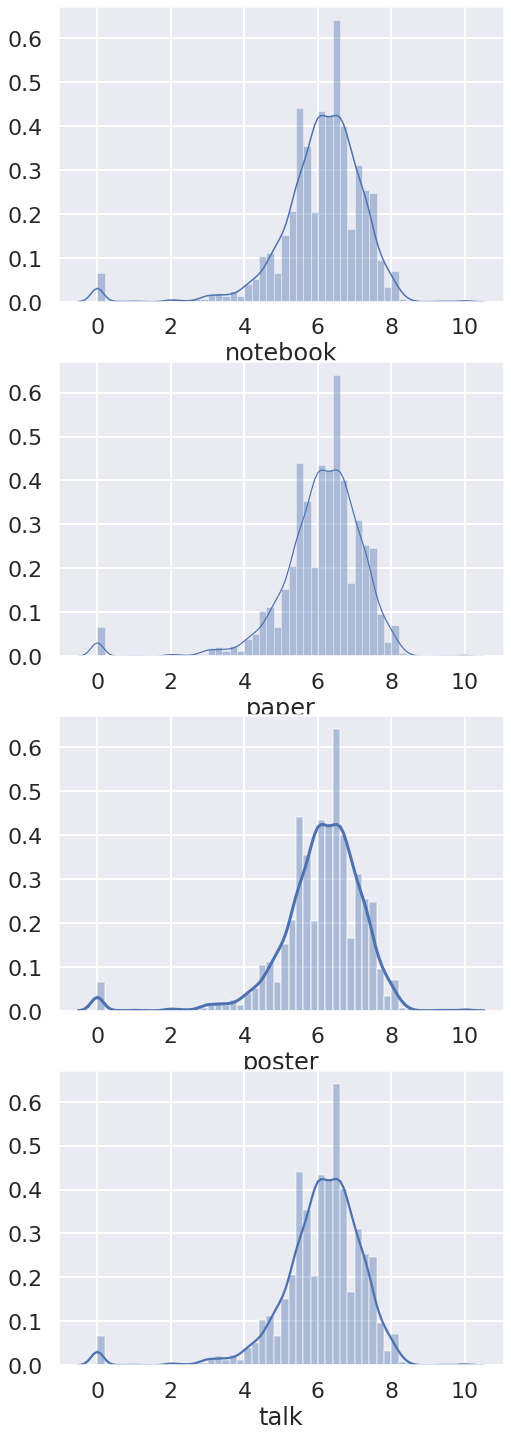

In [13]:
# sns.set() for文で回してみる
params = ['notebook', 'paper', 'poster', 'talk']
fig, ax = plt.subplots(4, 1, figsize=(8, 25))
for idx, i in enumerate(params):    
    sns.set(context=i, style='darkgrid')
    ax[idx] = sns.distplot(df['vote_average'], ax=ax[idx], axlabel=i)

# sns.set(stlye=)
#### 'darkgird', 'whitegird', 'dard', 'white', 'ticks'
- **よく使用されるのは ticks**

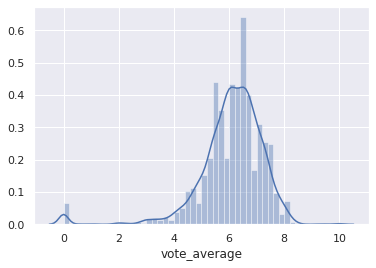

In [14]:
# style: 'darkgrid' / 背景が黒にグリッドが白に
sns.set(context='notebook', style='darkgrid')
sns.distplot(df['vote_average'])

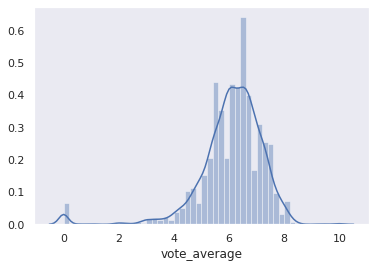

In [15]:
# style: 'whitegird' / 背景が黒に
sns.set(context='notebook', style='dark')
sns.distplot(df['vote_average'])

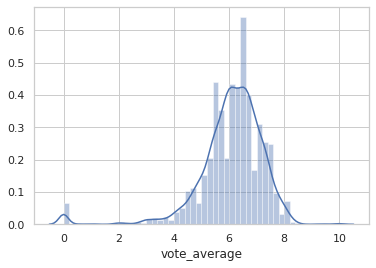

In [16]:
# style: 'whitegird' / 背景が白にグリッドが黒に
sns.set(context='notebook', style='whitegrid')
sns.distplot(df['vote_average'])

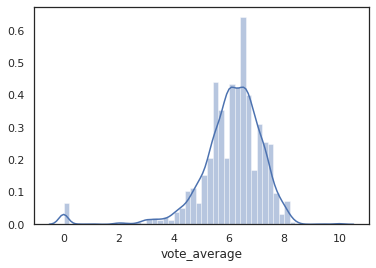

In [17]:
# style: 'white' / 背景が白に
sns.set(context='notebook', style='white')
sns.distplot(df['vote_average'])

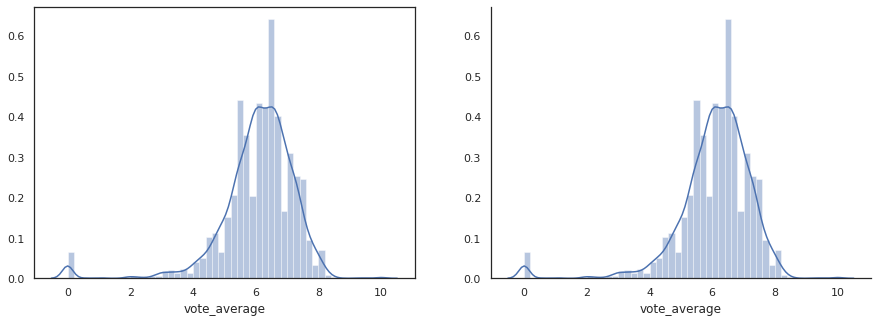

In [18]:
# style: 'ticks' / 何もない白の背景
fig, ax = plt.subplots(1, 2, figsize=(15, 5))
sns.set(context='notebook', style='ticks')
ax[0] = sns.distplot(df['vote_average'], ax=ax[0])

# despine : をつけるとスッキリする / top=True, right=True, left=False, bottom=False　で消す位置を指定できる
ax[1] = sns.distplot(df['vote_average'], ax=ax[1])
sns.despine(ax=ax[1])

## palette　:　(パレット)
参考：　https://matplotlib.org/stable/tutorials/colors/colormaps.html
- plot の色のスケールを指定することができる

### Seaborn の palette
- deep,　muted,　bright,　pastel,　dark,　colorblind

In [19]:
sns.set(context='poster', style='ticks', palette='dark')


# challenge

In [20]:
df = pd.read_csv('../pandas/dataset/tmdb_5000_movies.csv')
df.head(1)

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800


In [21]:
# filter 0 を除く（正しい値を算出するため）
df['vote_average'] = df[df['vote_average'] != 0]

# 年代別の columns 作成　 -> 2000
df['decade'] = df['release_date'].apply(lambda x: x[:4])

TypeError: 'float' object is not subscriptable

In [22]:
df[df['release_date'].isna()]

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
4553,0,[],NaN,380097,[],en,America Is Still the Place,1971 post civil rights San Francisco seemed li...,0.0,[],[],NaN,0,0.0,[],Released,NaN,America Is Still the Place,NaN,0


In [23]:
# filter 0 を除く（正しい値を算出するため） / NaN の排除
df = df[(df['vote_average'] != 0) & (~df['vote_average'].isna())]

# 年代別の columns 作成　 -> 2000 / NaN の排除
df = df[~df['release_date'].isna()]
df['decade'] = df['release_date'].apply(lambda x: x[:4])

In [24]:
df.head(1)

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,...,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count,decade
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...",...,2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,2.37e+08,11800,2009


In [25]:
# evaluation columns を作成 50%以上 : high 50%以下 : low -> 中央値以上、以下で分ける
# 中央値を求める : median() は処理が重い為　変数に格納して別々で処理する
vote_average_median = df['vote_average'].median()

df['vote_average'].apply(lambda x: 'high' if x > vote_average_median else 'low')

0       high
1       high
2       high
3       high
4       high
        ... 
4791     low
4792     low
4796     low
4798     low
4799     low
Name: vote_average, Length: 3755, dtype: object

In [26]:
# evaluation columns を作成 : high & low
vote_average_median = df['vote_average'].median()
df['evaluation'] = df['vote_average'].apply(lambda x: 'high' if x > vote_average_median else 'low')

In [27]:
df.head(1)

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,...,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count,decade,evaluation
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...",...,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,2.37e+08,11800,2009,high


## violinplot に落とし込む

In [28]:
# 1. file 読み込み
df = pd.read_csv('../pandas/dataset/tmdb_5000_movies.csv')

In [29]:
# 2. filter 0 を除く（正しい値を算出するため） / NaN の排除
df = df[(df['vote_average'] != 0) & (~df['vote_average'].isna())]

# 3. 年代別の columns 作成　 -> 2000 / NaN の排除
df = df[~df['release_date'].isna()]

# 4. decade columns 作成
df['decade'] = df['release_date'].apply(lambda x: x[:4])

# 5. evaluation columns を作成 50%以上 : high 50%以下 : low -> 中央値以上、以下で分ける
# 6. 中央値を求める : median() は処理が重い為　変数に格納して別々で処理する
vote_average_median = df['vote_average'].median()

# 7. evaluation columns を作成 : high & low
df['evaluation'] = df['vote_average'].apply(lambda x: 'high' if x > vote_average_median else 'low')

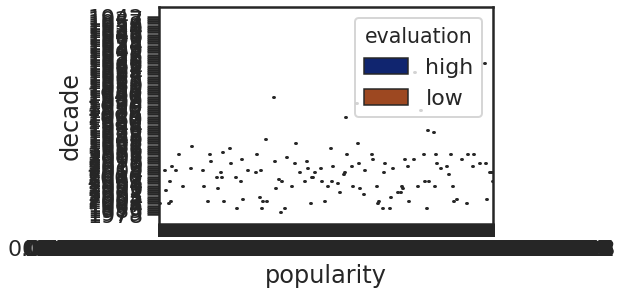

In [30]:
# violinplot で plot
ax = sns.violinplot(x='popularity', y='decade', hue='evaluation', data=df.sort_values('decade'))

# 回答

In [31]:
# 1. file 読み込み
df = pd.read_csv('../pandas/dataset/tmdb_5000_movies.csv')

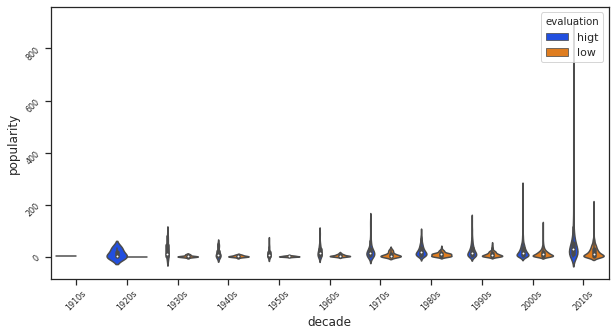

In [47]:
# palette: deep, muted, bright, dark, colorblind
sns.set(context='notebook', style='ticks', palette='bright')

# 2. 年代別の columns 作成　 -> 2000 / NaN の排除
df = df[~df['release_date'].isna()]

# 3. decade columns 作成 / 最初の３文字を取得してきて　 + 0s をすることで 10年おきのメモリを作成できる
df['decade'] = df['release_date'].apply(lambda x: x[:3] + '0s')

# 4. 中央値を求める : median() は処理が重い為　変数に格納して別々で処理する
vote_average_median = df['vote_average'].median()

# 5. evaluation columns を作成 50%以上 : high 50%以下 : low -> 中央値以上、以下で分ける
df['evaluation'] = df['vote_average'].apply(lambda x: 'higt' if x > vote_average_median else 'low')

# 6. violinplot
fig, ax = plt.subplots(figsize=(10, 5))
ax = sns.violinplot(x='decade', y='popularity', data=df.sort_values('decade'), hue='evaluation', ax=ax)
ax.tick_params(rotation=45, labelsize=8)

## hue を消してみる

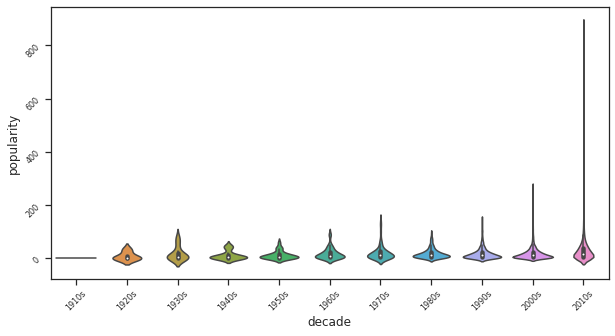

In [48]:
# palette: deep, muted, bright, dark, colorblind
sns.set(context='notebook', style='ticks', palette='bright')

# 2. 年代別の columns 作成　 -> 2000 / NaN の排除
df = df[~df['release_date'].isna()]

# 3. decade columns 作成 / 最初の３文字を取得してきて　 + 0s をすることで 10年おきのメモリを作成できる
df['decade'] = df['release_date'].apply(lambda x: x[:3] + '0s')

# 4. 中央値を求める : median() は処理が重い為　変数に格納して別々で処理する
vote_average_median = df['vote_average'].median()

# 5. evaluation columns を作成 50%以上 : high 50%以下 : low -> 中央値以上、以下で分ける
df['evaluation'] = df['vote_average'].apply(lambda x: 'higt' if x > vote_average_median else 'low')

# 6. violinplot
fig, ax = plt.subplots(figsize=(10, 5))
ax = sns.violinplot(x='decade', y='popularity', data=df.sort_values('decade'), ax=ax)
ax.tick_params(rotation=45, labelsize=8)

- sns.set(palette) の色は hue の時だけ色を変化させる


- violinplot　の引数に　palette がある
    - その引数に渡すもので色を変化させる

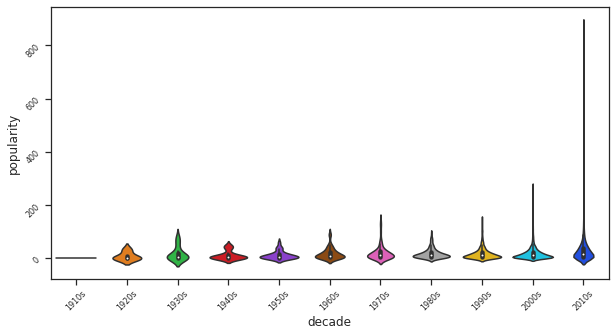

In [50]:
# palette: deep, muted, bright, dark, colorblind
sns.set(context='notebook', style='ticks')

# 2. 年代別の columns 作成　 -> 2000 / NaN の排除
df = df[~df['release_date'].isna()]

# 3. decade columns 作成 / 最初の３文字を取得してきて　 + 0s をすることで 10年おきのメモリを作成できる
df['decade'] = df['release_date'].apply(lambda x: x[:3] + '0s')

# 4. 中央値を求める : median() は処理が重い為　変数に格納して別々で処理する
vote_average_median = df['vote_average'].median()

# 5. evaluation columns を作成 50%以上 : high 50%以下 : low -> 中央値以上、以下で分ける
df['evaluation'] = df['vote_average'].apply(lambda x: 'higt' if x > vote_average_median else 'low')

# 6. violinplot
fig, ax = plt.subplots(figsize=(10, 5))
ax = sns.violinplot(x='decade', y='popularity', data=df.sort_values('decade'), palette='bright', ax=ax)
ax.tick_params(rotation=45, labelsize=8)

## 付属情報

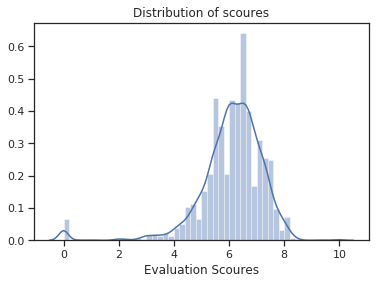

In [56]:
sns.distplot(df['vote_average'])
plt.title('Distribution of scoures')
plt.xlabel('Evaluation Scoures')
plt.savefig('save_seaborn.png')

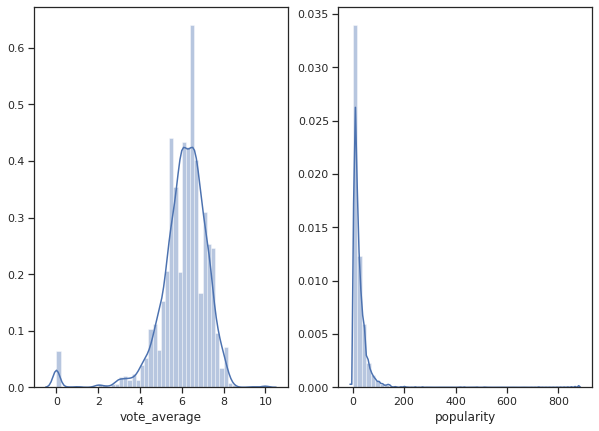

In [67]:
fig, axes = plt.subplots(1, 2, figsize=(10, 7))
sns.distplot(df['vote_average'], ax=axes[0])
sns.distplot(df['popularity'], ax=axes[1])